# Assignement 2
## Due May 3st

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# new add
from collections import defaultdict
# debug
ON = True
OFF = False
DEBUG = ON

# Exercise 1

Here we define the function that will generate our data

In [2]:
"""
http://www.cnblogs.com/qqhfeng/p/5294583.html
"""
def get_gaussian2d_data_with_labels(n1, n2):

    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)

    mu1 = [1, 1] # 均值
    var1 = [[0.2, 0],
            [0, 0.2]] # 协方差

    mu2 = [3, 1] # 均值
    var2 = [[2, 0],
            [0, 2]] # 协方差

    # Join a sequence of arrays along an existing axis.
    """
    When one or more of the arrays to be concatenated is a MaskedArray,
    this function will return a MaskedArray object instead of an ndarray,
    but the input masks are not preserved. In cases where a MaskedArray 
    is expected as input, use the ma.concatenate function from the masked 
    array module instead.
    # sample
    >>> a = np.array([[1, 2], [3, 4]])
    >>> b = np.array([[5, 6]])
    >>> np.concatenate((a, b), axis=0)
    array([[1, 2],
           [3, 4],
           [5, 6]])
    >>> np.concatenate((a, b.T), axis=1)
    array([[1, 2, 5],
           [3, 4, 6]])
    """
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])

    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])

    return data, labels

## a)

Create train dataset and plot it

In [3]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(
                                    train_n1, train_n2)

if DEBUG:
    print('train_data: {}\ntrain_labels:{}'.format(
                    len(train_data), len(train_labels)))

train_data: 50
train_labels:50


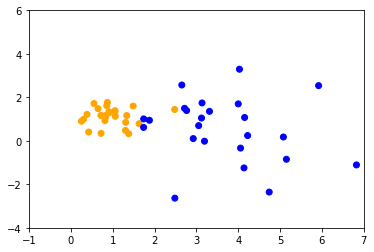

In [4]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset and plot it

In [5]:
# test_n1, test_n2
test_n1, test_n2 = 100, 100

# test_data, test_labels
test_data, test_labels = get_gaussian2d_data_with_labels(test_n1, test_n2)

# display the length of test_labels
print('length of the test_labels: {}'.format(len(test_labels)))

length of the test_labels: 200


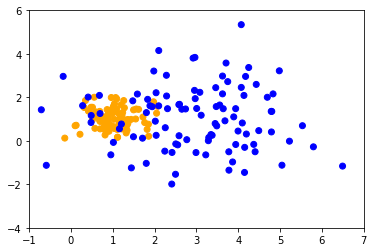

In [6]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in test_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## b)

Define knn and predict with $k = 3$ and plot the result

In [7]:
"""
name:
    knnClassify

params:
    train_data     -
    train_labels   -
    test_data      -
    k              - default is 1

output:
    type: np.asarray
"""
def knnClassify(train_data, train_labels, test_data, k=1):
    predictLabel = []
    for test_d in test_data:
        dists = []
        for i in range(len(train_data)):
            train_d = train_data[i]
            train_l = train_labels[i]
            dist = np.sqrt(np.sum(np.square(train_d - test_d)))
            dists.append((i, dist))

        k_min_dist = sorted(dists, key=lambda x: x[1])
        k_min_dist = k_min_dist[0:k]
        countDict = defaultdict(int)
        for j in range(k):
            countDict[train_labels[k_min_dist[j][0]]] += 1
        p_l = max(zip(countDict.values(), countDict.keys()))[1]
        predictLabel.append(p_l)

    return np.asarray(predictLabel)

In [8]:
# compute the prepared labels
pred_labels = knnClassify(train_data, train_labels, test_data, k=3)

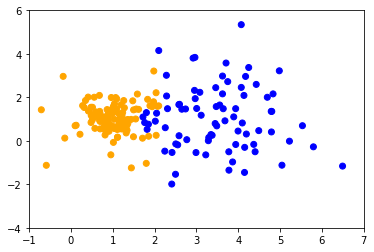

In [9]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in pred_labels]
# plot
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## c)

Plot the correct predictions in black and the wrong one in red

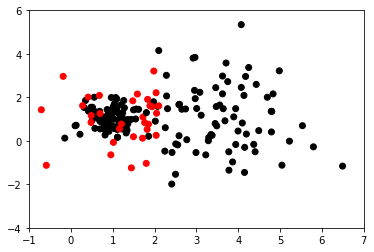

In [10]:
# if correct, correct_preds[i] will be 0, else 1 or -1
correct_preds = pred_labels - test_labels
# plot
fig = plt.figure()
color = ['black' if l == 0 else 'red' for l in correct_preds]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## d)

define the empirical risk with 0-1-loss and compute the 0-1 loss for the labels predicted above

In [11]:
def empRiskWith01loss(test_labels, pred_labels):
    count = 0
    for i in range(len(test_labels)):
        if test_labels[i] != pred_labels[i]:
            count +=1
    return count*1.0/len(test_labels)

Compute the risk for various k and plot it

In [12]:
ks = [1, 3, 5, 7, 10, 15, 20]
kRisk = []
for newk in ks:
    new_pred_labels = knnClassify(train_data, train_labels, test_data, k=newk)
    new_empRisk = empRiskWith01loss(test_labels,new_pred_labels)
    kRisk.append(new_empRisk)

kRisk: [0.15, 0.155, 0.15, 0.125, 0.13, 0.145, 0.15]


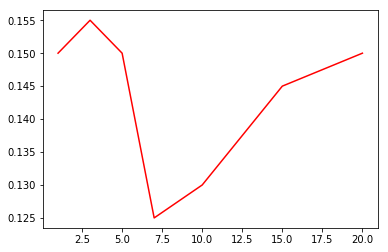

In [13]:
print('kRisk: {}'.format(kRisk))
fig = plt.figure()
plt.plot(ks,kRisk, 'r')
plt.show()

### e)

Create train dataset with n1 = n2 = 500, plot it and repeat the same analysis as in d)

In [14]:
e_train_n1, e_train_n2 = 500,500
e_train_data, e_train_labels = get_gaussian2d_data_with_labels(e_train_n1, e_train_n2)

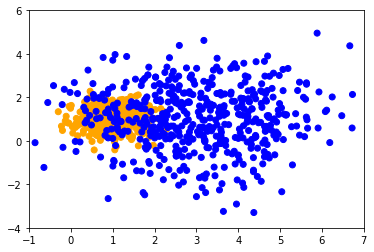

In [15]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in e_train_labels]
plt.scatter(e_train_data[:, 0], e_train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

In [16]:
ek = [1, 3, 5, 7, 10, 15, 20]
eRisk = []
for newk in ks:
    new_pred_labels = knnClassify(e_train_data, e_train_labels, test_data, k=newk)
    new_empRisk = empRiskWith01loss(test_labels,new_pred_labels)
    eRisk.append(new_empRisk)

[0.15, 0.105, 0.095, 0.09, 0.095, 0.085, 0.095]


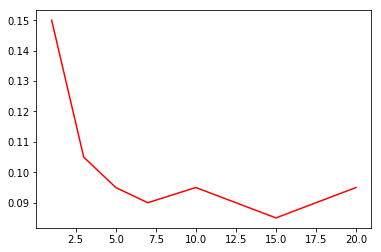

In [17]:
print(eRisk)
fig = plt.figure()
plt.plot(ek,eRisk, 'r')
plt.show()

### f)

Create train dataset with n1 = n2 = 1000, plot it and repeat the same analysis as in d)

In [18]:
# train_n1, train_n2
# train_data, train_labels = 

In [19]:
f_train_n1, f_train_n2 = 1000,1000
f_train_data, f_train_labels = get_gaussian2d_data_with_labels(f_train_n1, f_train_n2)

In [20]:
fk = [1, 3, 5, 7, 10, 15, 20]
fRisk = []
for newk in fk:
    f_pred_labels = knnClassify(f_train_data, f_train_labels, test_data, k=newk)
    f_empRisk = empRiskWith01loss(test_labels,f_pred_labels)
    fRisk.append(f_empRisk)

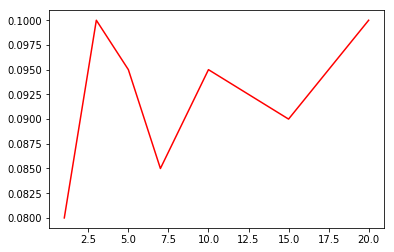

In [21]:
fig = plt.figure()
plt.plot(fk,fRisk, 'r')
plt.show()

# Exercise 2

Load data and show one class

In [22]:
train_df = pd.read_csv('train.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).as_matrix()
train_labels = train_df['Label'].as_matrix()
test_df = pd.read_csv('test.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).as_matrix()
test_labels = test_df['Label'].as_matrix()

## a)

Find out if the dataset is balanced

 The amount of samples for training data is balance
 The amount of samples for test data is balance


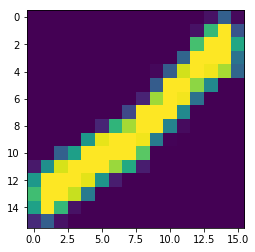

In [26]:
trainLabelsDict = defaultdict(int)
trainTag = 0
for i in train_labels:
    trainLabelsDict[i]+=1
trainCheck = trainLabelsDict
trainLabelsValues = list(trainLabelsDict.values())
for i in range(1,len(trainLabelsValues)):
    if trainLabelsValues[i] != trainLabelsValues[i-1]:
        trainTag = 1
        break
if trainTag:
    print(" The amount of samples for training data is not balance")
else:
    print(" The amount of samples for training data is balance")
    
testTag = 0
testLabelsDict = defaultdict(int)
testTag = 0
for i in test_labels:
    testLabelsDict[i]+=1
testCheck = testLabelsDict
testLabelsValues = list(testLabelsDict.values())
for i in range(1,len(testLabelsValues)):
    if testLabelsValues[i] != testLabelsValues[i-1]:
        testTag = 1
        break

if testTag:
    print(" The amount of samples for test data is not balance")
else:
    print(" The amount of samples for test data is balance")

plt.imshow(train_data[3].reshape(16,16))

## b)

Compute knn for the USPS dataset

In [24]:
from sklearn.neighbors import KDTree
from collections import Counter
import time
def kdtreeKnnClassify(train_data, train_labels, test_data, k=1):
    predictLabels = []
    tree = KDTree(train_data,leaf_size=400, metric='euclidean')
    for td in test_data:
        tmpDist, tmpInd = tree.query([td], k)
        knnLabels = []
        for i in range(k):
            knnLabels.append(train_labels[tmpInd[0][i]])
        counterLabels = Counter(knnLabels)
        p_label =counterLabels.most_common(1)[0][0]
        predictLabels.append(p_label)
    
    return predictLabels
    
def kdtreeEmpRiskWith01loss(test_labels, pred_labels):
    count = 0
    for i in range(len(test_labels)):
        if test_labels[i] != pred_labels[i]:
            count+=1
    return count*1.0/len(test_labels)
    
start = time.time()
ks = range(1,20)
kRisk = []
for newk in ks:
    new_pred_labels = kdtreeKnnClassify(train_data, train_labels, test_data, k=newk)
    new_empRisk = kdtreeEmpRiskWith01loss(test_labels,new_pred_labels)
    kRisk.append(new_empRisk)
    print('k = %d is over.'%newk)

print('running time is ',time.time()-start)


k = 1 is over.
k = 2 is over.
k = 3 is over.
k = 4 is over.
k = 5 is over.
k = 6 is over.
k = 7 is over.
k = 8 is over.
k = 9 is over.
k = 10 is over.
k = 11 is over.
k = 12 is over.
k = 13 is over.
k = 14 is over.
k = 15 is over.
k = 16 is over.
k = 17 is over.
k = 18 is over.
k = 19 is over.
running time is  91.88087391853333


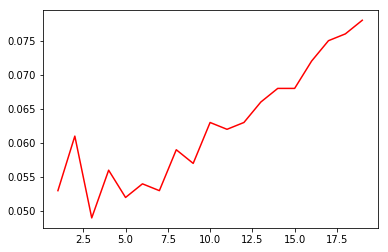

In [25]:
fig = plt.figure()
plt.plot(ks,kRisk, 'r')
plt.show()